

# Drivendata.com competitions

---
Flu Shot Learning: Predict H1N1 and Seasonal Flu Vaccines

The features in this dataset are as follows:

---

*    h1n1_concern - Level of concern about the H1N1 flu

*      h1n1_knowledge - Level of knowledge about H1N1 flu

*  behavioral_antiviral_meds - Has taken antiviral medications
*   behavioral_avoidance - Has avoided close contact with others with flu-like symptoms
*   behavioral_face_mask - Has bought a face mask
*   behavioral_wash_hands - Has frequently washed hands or used hand sanitizer
*   behavioral_large_gatherings - Has reduced time at large gatherings
*   behavioral_outside_home - Has reduced contact with people outside of own household
*   behavioral_touch_face - Has avoided touching eyes, nose, or mouth
*   doctor_recc_h1n1 - H1N1 flu vaccine was recommended by doctor
*   doctor_recc_seasonal - Seasonal flu vaccine was recommended by doctor
*   chronic_med_condition - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness
*   child_under_6_months - Has regular close contact with a child under the age of six months
*   health_worker - Is a healthcare worker
*   health_insurance - Has health insurance
*   opinion_h1n1_vacc_effective - Respondent's opinion about H1N1 vaccine effectiveness
*   opinion_h1n1_risk - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine
*   opinion_h1n1_sick_from_vacc - Respondent's worry of getting sick from taking H1N1 vaccine
*   opinion_seas_vacc_effective - Respondent's opinion about seasonal flu vaccine effectiveness
*  opinion_seas_risk - Respondent's opinion about risk of getting sick with seasonal flu without vaccine
*   opinion_seas_sick_from_vacc - Respondent's worry of getting sick from taking seasonal flu vaccine
*  age_group - Age group of respondent
*   education - Self-reported education lev
*   race - Race of respondent
*   sex - Sex of respondent
*   income_poverty - Household annual income of respondent with respect to 2008 Census poverty thresholds
*   marital_status - Marital status of respondent
*   rent_or_own - Housing situation of respondent
*   employment_status - Employment status of respondent
*   hhs_geo_region - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings
*   census_msa - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census
*   household_adults - Number of other adults in household, top-coded to 3
*   household_children - Number of children in household, top-coded to 3
*   employment_industry - Type of industry respondent is employed in. Values are represented as short random character strings
*   employment_occupation - Type of occupation of respondent. Values are represented as short random character strings

















# Importing libraries

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import itertools
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.colors as mcolors





# Data loading

In [ ]:
x_train= pd.read_csv('drive/My Drive/calismalar/H1N1/training_set_features.csv')
y_train = pd.read_csv('drive/My Drive/calismalar/H1N1/training_set_labels.csv')
x_test = pd.read_csv('drive/My Drive/calismalar/H1N1/test_set_features.csv')

# Data Exploration

In [ ]:
total_train = pd.concat([x_train,y_train],axis = 1)


In [ ]:
total_train.shape

(26707, 39)

In [ ]:
total_train.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,1,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,2,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,3,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,4,0,0


In [ ]:
total_train.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,respondent_id,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,24547.000000,25736.000000,25887.000000,25903.000000,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,0.329735,0.283261,0.082590,0.111918,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,13353.000000,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,0.470126,0.450591,0.275266,0.315271,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,7709.791156,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,6676.500000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,13353.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,20029.500000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,26706.000000,1.000000,1.000000


In [ ]:
total_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

# Data Visualization 

Heatmap :

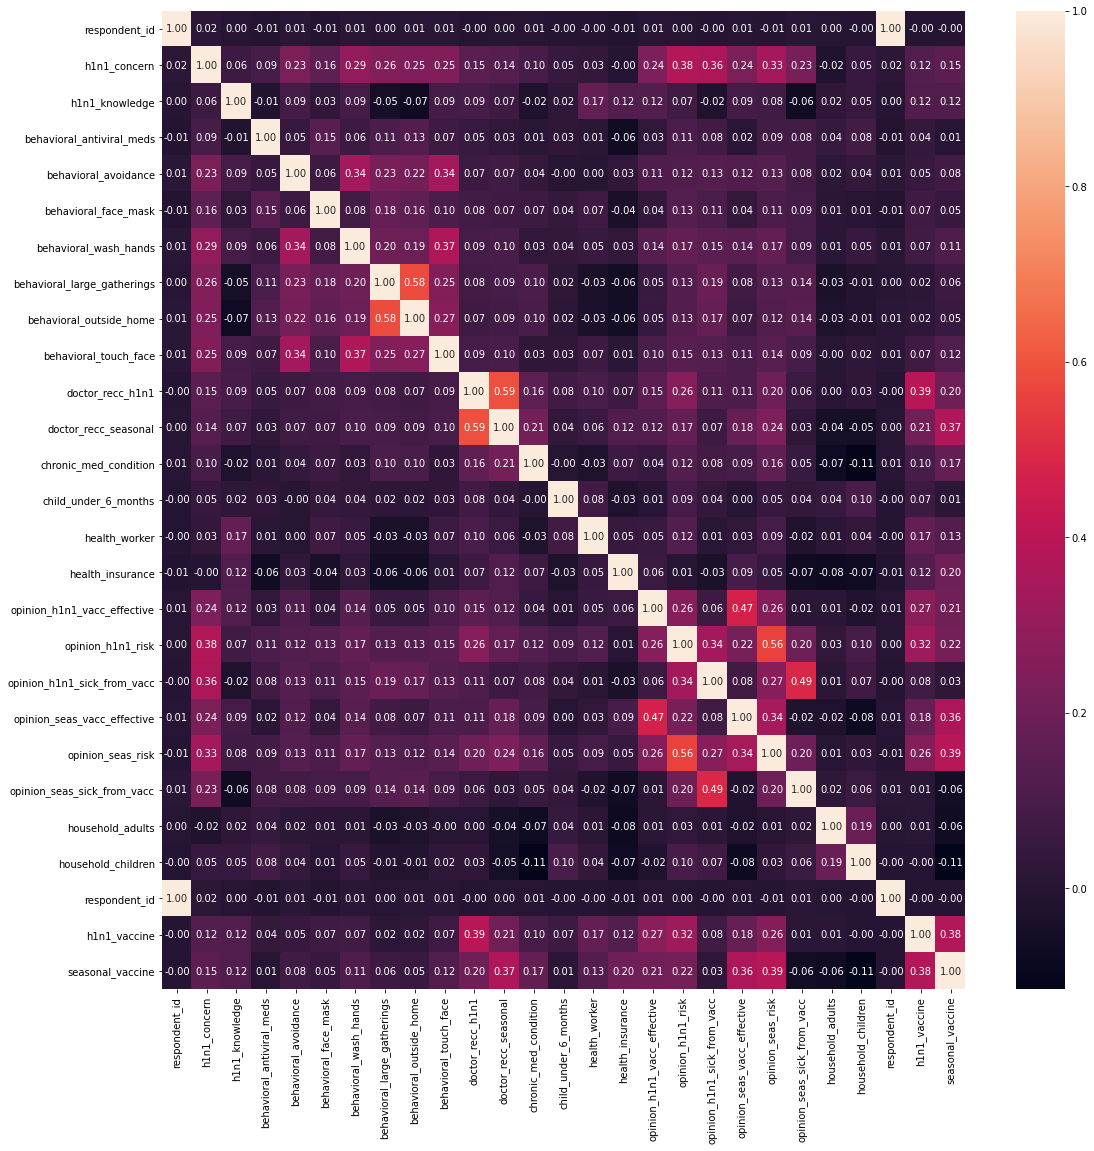

In [ ]:
plt.subplots(figsize=(18,18))
sns.heatmap(total_train.corr(), annot=True, fmt=".2f")
plt.show()

In [ ]:
corr=total_train.corr().abs()
n_cor = 7
h1n1_most_correlated_feature=corr['h1n1_vaccine'].sort_values(ascending=False)[:n_cor].drop('h1n1_vaccine')
h1n1_most_correlated_feature_name= h1n1_most_correlated_feature.index.values

Text(0.5, 1.0, "The features most correlated to 'h1n1 vaccine' result")

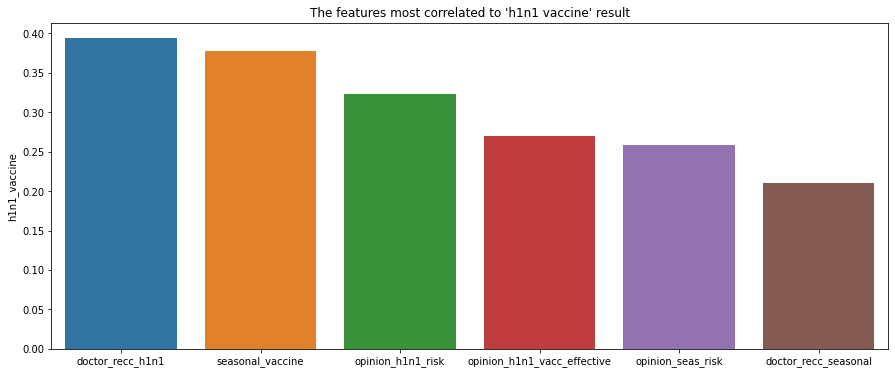

In [ ]:
f, ax = plt.subplots(figsize=(15, 6))

sns.barplot(x=h1n1_most_correlated_feature_name, y=h1n1_most_correlated_feature)
plt.title("The features most correlated to 'h1n1 vaccine' result")

In [ ]:
corr=total_train.corr().abs()
n_cor = 7
seas_most_correlated_feature=corr['seasonal_vaccine'].sort_values(ascending=False)[:n_cor].drop('seasonal_vaccine')
seas_most_correlated_feature_name = seas_most_correlated_feature.index.values

Text(0.5, 1.0, "The features most correlated to 'seasonal vaccine' result")

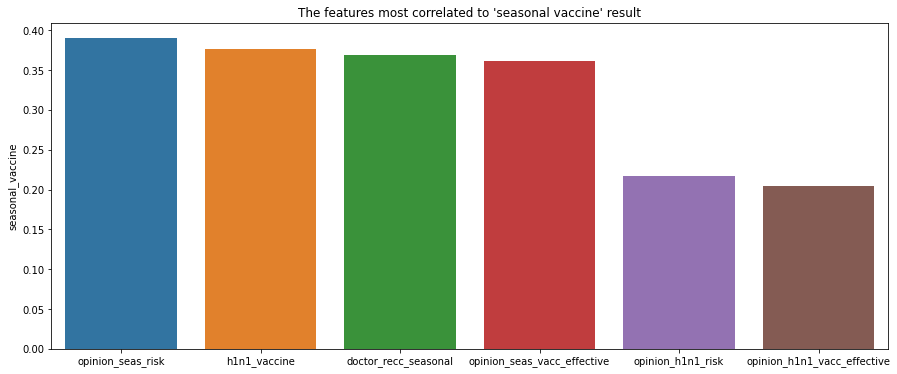

In [ ]:
f, ax = plt.subplots(figsize=(15, 6))

sns.barplot(x=seas_most_correlated_feature_name, y=seas_most_correlated_feature)
plt.title("The features most correlated to 'seasonal vaccine' result")

In [ ]:

colors = 'rgbkymc'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  after removing the cwd from sys.path.


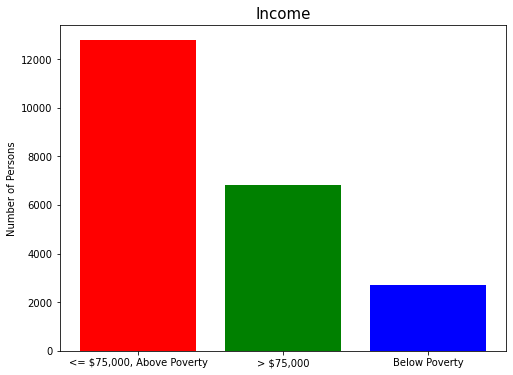

In [ ]:
plt.subplots(figsize=(8,6))
income_poverty =  total_train['income_poverty'].value_counts()

plt.bar(x= income_poverty.index ,height= income_poverty.values , color = colors  )

plt.ylabel("Number of Persons")
plt.title('Income' , fontsize=15)
plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


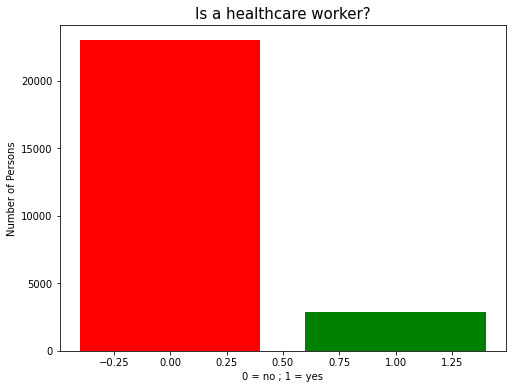

In [ ]:
plt.subplots(figsize=(8,6))
health_worker =  total_train['health_worker'].value_counts()
plt.bar(health_worker.index ,  health_worker.values ,color= colors  )
plt.title("Is a healthcare worker?" ,fontsize=15 )
plt.ylabel("Number of Persons")
plt.xlabel("0 = no ; 1 = yes")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


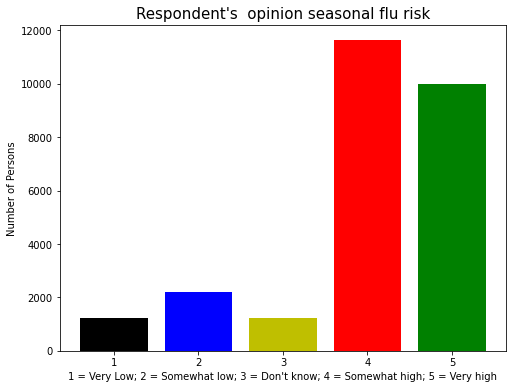

In [ ]:
plt.subplots(figsize=(8,6))
opinion_seas_vacc_effective =  total_train['opinion_seas_vacc_effective'].value_counts()
plt.bar(x= opinion_seas_vacc_effective .index , height= opinion_seas_vacc_effective.values ,color= colors  )
plt.title("Respondent's  opinion seasonal flu risk" ,fontsize=15)
plt.ylabel("Number of Persons")
plt.xlabel("1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high" )
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  """


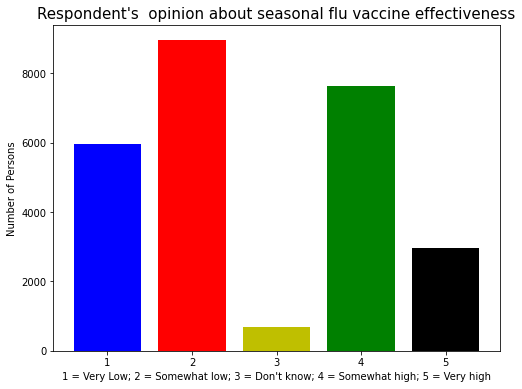

In [ ]:
plt.subplots(figsize=(8,6))
opinion_seas_risk =  total_train['opinion_seas_risk'].value_counts()


plt.bar(x= opinion_seas_risk.index ,height= opinion_seas_risk.values , color = colors  )
plt.title("Respondent's  opinion about seasonal flu vaccine effectiveness" ,fontsize=15)
plt.ylabel("Number of Persons")
plt.xlabel("1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


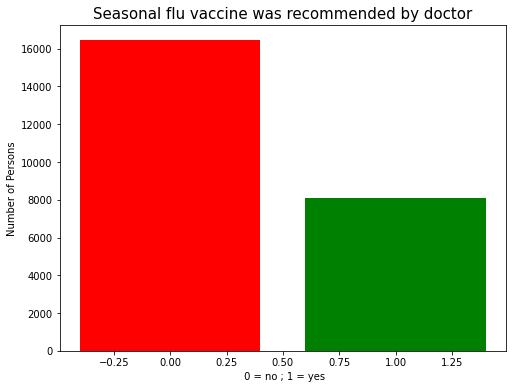

In [ ]:
plt.subplots(figsize=(8,6))
doctor_recc_seasonal =  total_train['doctor_recc_seasonal'].value_counts()
plt.bar(x= doctor_recc_seasonal.index , height= doctor_recc_seasonal.values ,color= colors  )
plt.title("Seasonal flu vaccine was recommended by doctor" ,fontsize=15)
plt.ylabel("Number of Persons")
plt.xlabel(" 0 = no ; 1 = yes" )
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  after removing the cwd from sys.path.


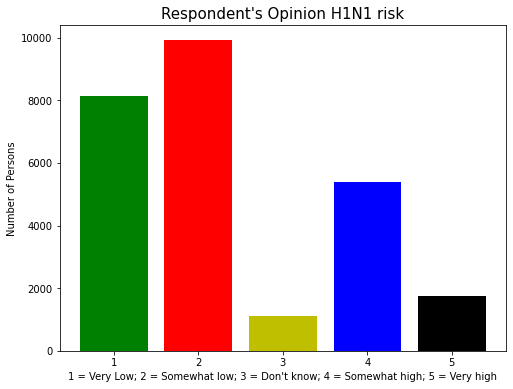

In [ ]:
plt.subplots(figsize=(8,6))
opinion_h1n1_risk =  total_train['opinion_h1n1_risk'].value_counts()

plt.bar(x= opinion_h1n1_risk.index ,height= opinion_h1n1_risk.values , color = colors  )
plt.title("Respondent's Opinion H1N1 risk" ,fontsize=15 )
plt.ylabel("Number of Persons")
plt.xlabel("1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high")
plt.show()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  """


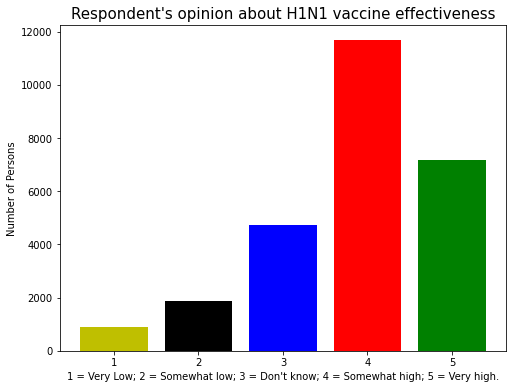

In [ ]:
plt.subplots(figsize=(8,6))
opinion_h1n1_vacc_effective =  total_train['opinion_h1n1_vacc_effective'].value_counts()


plt.bar(x= opinion_h1n1_vacc_effective.index ,height= opinion_h1n1_vacc_effective.values  , color = colors)
plt.title("Respondent's opinion about H1N1 vaccine effectiveness" ,fontsize=15)
plt.ylabel("Number of Persons")
plt.xlabel("1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


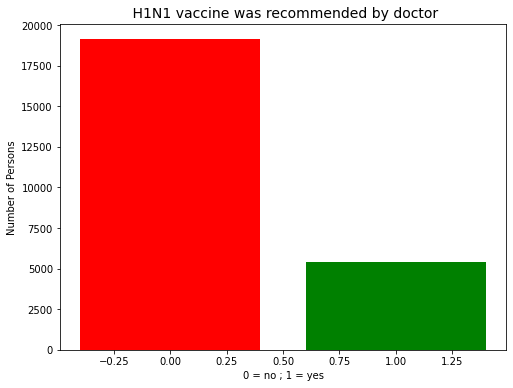

In [ ]:
plt.subplots(figsize=(8,6))
doctor_recc_h1n1 =  total_train['doctor_recc_h1n1'].value_counts()
plt.bar(x= doctor_recc_h1n1.index , height= doctor_recc_h1n1.values ,color= colors  )
plt.title(" H1N1 vaccine was recommended by doctor" ,fontsize=14)
plt.ylabel("Number of Persons")
plt.xlabel("0 = no ; 1 = yes")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


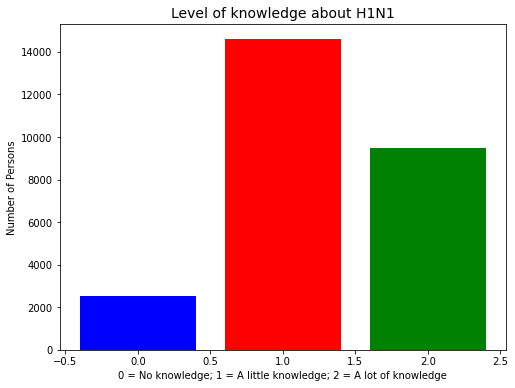

In [ ]:
plt.subplots(figsize=(8,6))
h1n1_knowledge =  total_train['h1n1_knowledge'].value_counts()
plt.bar(x= h1n1_knowledge.index , height= h1n1_knowledge.values ,color= colors  )
plt.title("Level of knowledge about H1N1" ,fontsize=14)
plt.ylabel("Number of Persons")
plt.xlabel("0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge" )
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


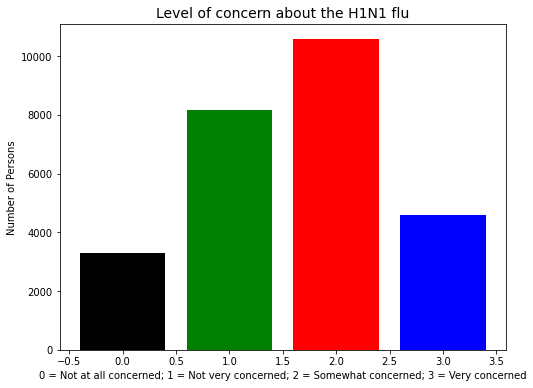

In [ ]:
plt.subplots(figsize=(8,6))
h1n1_concern =  total_train['h1n1_concern'].value_counts()
plt.bar(x= h1n1_concern.index , height= h1n1_concern.values ,color= colors  )
plt.title("Level of concern about the H1N1 flu" ,fontsize=14)
plt.ylabel("Number of Persons")
plt.xlabel("0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned" )
plt.show()

# Missing data

We are going to concatenate train and test data.This will save us time during data preprocessing

In [ ]:
total_df = pd.concat([x_train,x_test],axis = 0)

In [ ]:
total_df.isnull().sum()

respondent_id                      0
h1n1_concern                     177
h1n1_knowledge                   238
behavioral_antiviral_meds        150
behavioral_avoidance             421
behavioral_face_mask              38
behavioral_wash_hands             82
behavioral_large_gatherings      159
behavioral_outside_home          164
behavioral_touch_face            256
doctor_recc_h1n1                4320
doctor_recc_seasonal            4320
chronic_med_condition           1903
child_under_6_months            1633
health_worker                   1593
health_insurance               24502
opinion_h1n1_vacc_effective      789
opinion_h1n1_risk                768
opinion_h1n1_sick_from_vacc      770
opinion_seas_vacc_effective      914
opinion_seas_risk               1013
opinion_seas_sick_from_vacc     1058
age_group                          0
education                       2814
race                               0
sex                                0
income_poverty                  8920
m

employment_industry  and employment_occupation does contain too many null values and they also have little effect for results

In [ ]:

total_df.drop( columns= ['employment_occupation','employment_industry'],axis = 1,inplace= True)



In [ ]:
def NullValues(M,Label):
  NullVal = []
  NullCol = []
  for x in Label:
    NoneVal = M[x].isnull().sum()
    if NoneVal != 0:
      NullVal.append(NoneVal)
      NullCol.append(x)
  return [x for _,x in sorted(zip(NullVal,NullCol))]  , sorted(NullVal)

In [ ]:
columns_list = list(total_df.columns.values) 
X ,  Y =  NullValues(total_df ,columns_list  )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


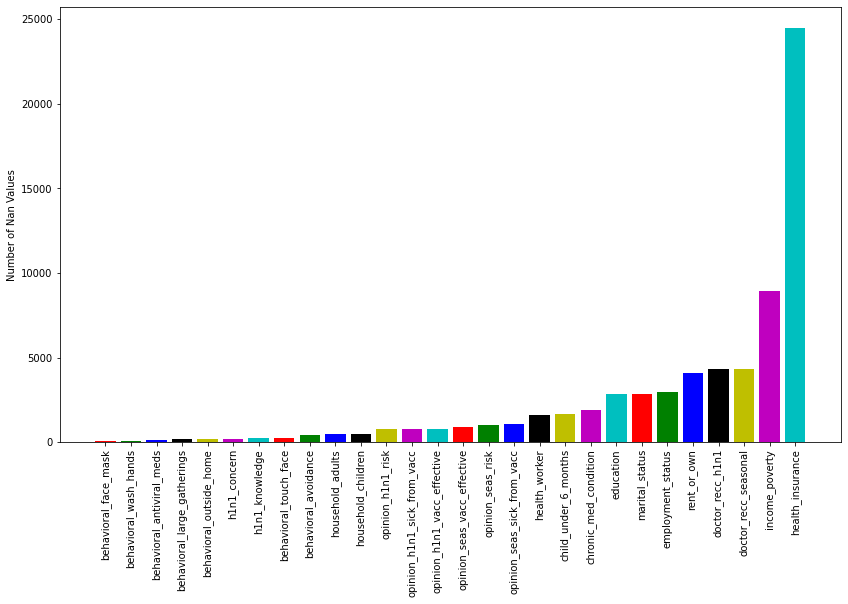

In [ ]:
plt.subplots(figsize=(14,8))
plt.xticks(rotation='90')
plt.bar(height= Y,x= X ,color= colors  )
plt.ylabel("Number of Nan Values")

plt.show()

In [ ]:
imputer= SimpleImputer( missing_values=np.nan, strategy = 'most_frequent')   
imputer = imputer.fit(total_df)
total_df  = imputer.transform(total_df)
total_df =  pd.DataFrame(data =total_df , columns =columns_list)

In [ ]:
total_df.isnull().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

Defining the columns types

This function defines  which columns are categorical which are numerical

In [ ]:
def Column_labeler(Df,Label):
    bin_str_col = []
    cat_str_col = []
    bin_col = []
    cat_col = []
    for x in Label:
        if  0 in Df[x].values and  2 not in Df[x].values:
            bin_col.append(x)
        elif  2 in Df[x].values :
            cat_col.append(x)
        else:
            if len(np.unique(Df[x].values)) == 2:
                 bin_str_col.append(x)
            else:
                cat_str_col.append(x)
                
    return  bin_col , bin_str_col , cat_col, cat_str_col

In [ ]:
columns_list = list(total_df.columns.values) 
bin_col , bin_str_col , cat_col, cat_str_col = Column_labeler(total_df,columns_list)

Label encoding

In [ ]:
Lb = LabelEncoder()
for x in bin_str_col:
    total_df[x] = Lb.fit_transform(total_df[x])

One hot encoding

In [ ]:
total_df =  pd.get_dummies(total_df , columns =[x for x in cat_str_col])

In [ ]:
total_df.shape

(53415, 59)

Our dataset contains various data types. Such as object ,  uint8 ,int64. We have to convert all of these to float data types. 
Otherwise our model will not work.

In [ ]:
total_df.info()

In [ ]:
New_columns_list = list(total_df.columns.values) 
for columns in New_columns_list :
    total_df[columns] = total_df[columns].astype(float)

In [ ]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53415 entries, 0 to 53414
Data columns (total 59 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   respondent_id                             53415 non-null  float64
 1   h1n1_concern                              53415 non-null  float64
 2   h1n1_knowledge                            53415 non-null  float64
 3   behavioral_antiviral_meds                 53415 non-null  float64
 4   behavioral_avoidance                      53415 non-null  float64
 5   behavioral_face_mask                      53415 non-null  float64
 6   behavioral_wash_hands                     53415 non-null  float64
 7   behavioral_large_gatherings               53415 non-null  float64
 8   behavioral_outside_home                   53415 non-null  float64
 9   behavioral_touch_face                     53415 non-null  float64
 10  doctor_recc_h1n1                  

Separating total data set

In [ ]:
Ready_xtrain = pd.DataFrame(total_df , index = range(26707) ,columns = New_columns_list ) 

Ready_xtest = pd.DataFrame(total_df , index = range(26707,53415) ,columns = New_columns_list )  

In [ ]:
Ready_xtrain.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,sex,marital_status,rent_or_own,household_adults,household_children,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_12 Years,education_< 12 Years,education_College Graduate,education_Some College,race_Black,race_Hispanic,race_Other or Multiple,race_White,"income_poverty_<= $75,000, Above Poverty","income_poverty_> $75,000",income_poverty_Below Poverty,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,hhs_geo_region_atmpeygn,hhs_geo_region_bhuqouqj,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,1.0,1.0,4.0,1.0,2.0,1.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,3.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,5.0,5.0,4.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4.0,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,3.0,2.0,3.0,1.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


If the columns names of  data set contains invalid characters (such as :   <,>,\ ) xgboost doesn't work. We have to drop these characters

In [ ]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
Ready_xtrain.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in Ready_xtrain.columns.values]
Ready_xtest.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in Ready_xtest.columns.values]

In [ ]:
H1N1 = y_train[['h1n1_vaccine']]
SEAS = y_train[['seasonal_vaccine']]


# Model and Predictions

In [ ]:
from xgboost import XGBRegressor
Classifier = XGBRegressor()

In [ ]:
Ready_xtrain.shape

(26707, 59)

Parameter Tuning

In [ ]:
reg_lambda = list(np.arange(0, 5, 0.05))
n_estimators = [_ for _ in range(0,20) ]
max_dept = [_ for _ in range(0,10)]
booster = ['gbtree','gblinear']
gamma = list(np.arange(0, 0.5, 0.05))
min_split_loss = [_ for _ in range(0,10) ]
tweedie_variance_power = list(np.arange(0, 2, 0.05))

learning_rate = list(np.arange(0, 0.8, 0.05))
min_child_weight = [_ for _ in range(4)]
base_score =  list(np.arange(0, 1, 0.05))
hyperparamater_grid = {'n_estimators': n_estimators ,'max_dept':max_dept,'booster':booster ,
'min_child_weight':min_child_weight,'learning_rate':learning_rate,'base_score':base_score  , 'tweedie_variance_power':tweedie_variance_power , 'min_split_loss':min_split_loss }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

random = RandomizedSearchCV(estimator =Classifier,param_distributions=hyperparamater_grid,
  return_train_score = True )

In [ ]:
random.fit(Ready_xtrain, H1N1)

[17:53:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:53:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:53:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:53:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:53:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:53:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:53:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:53:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alp...
                                                                   0.30000000000000004,
                                                                   0.35000000000000003,
            

In [ ]:
print('\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\')
print('Best Estimators\n') 
print(random.best_estimator_)
print('\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\')


\\\\\\\\\\\\\\\\\\\\\\\\
Best Estimators

XGBRegressor(base_score=0.35000000000000003, booster='gbtree',
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             gamma=0, importance_type='gain', learning_rate=0.7000000000000001,
             max_delta_step=0, max_dept=3, max_depth=3, min_child_weight=0,
             min_split_loss=3, missing=None, n_estimators=13, n_jobs=1,
             nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, tweedie_variance_power=1.9000000000000001,
             verbosity=1)
\\\\\\\\\\\\\\\\\\\\\\\\


In [ ]:
Classifier = XGBRegressor(base_score=0.35000000000000003, booster='gbtree',
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             gamma=0, importance_type='gain', learning_rate=0.7000000000000001,
             max_delta_step=0, max_dept=3, max_depth=3, min_child_weight=0,
             min_split_loss=3, missing=None, n_estimators=13, n_jobs=1,
             nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
             subsample=1, tweedie_variance_power=1.9000000000000001,
             verbosity=1)

In [ ]:
Classifier.fit(Ready_xtrain , H1N1 )
H1N1_Pred_XG = Classifier.predict(Ready_xtest)
Classifier.fit(Ready_xtrain , SEAS )
SEAS_Pred_XG = Classifier.predict(Ready_xtest)

[17:55:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:55:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
H1N1 =  pd.DataFrame(data = H1N1_Pred_XG , index=range(26708), columns=["h1n1_vaccine"])

SEAS  =  pd.DataFrame(data = SEAS_Pred_XG , index=range(26708), columns=["seasonal_vaccine"])

In [ ]:
submission = pd.read_csv("drive/My Drive/calismalar/H1N1/submission_format.csv")
Result =  pd.concat([submission[["respondent_id"]],H1N1,SEAS],axis=1)
Result.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,26707,0.110897,0.381395
1,26708,0.033966,-0.135025
2,26709,0.413989,0.757624
3,26710,0.421871,0.869956
4,26711,0.231260,0.495580


In [ ]:
Result.to_csv('drive/My Drive/calismalar/H1N1/predict[6].csv',index=False)

#0.8347  accuracy score drivendata.com "H1N1 and seasonal flu" competition